In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *

In [8]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)
mapping_meta = pd.read_msgpack('/home/hanliu/project/mouse_rostral_brain/metadata/CellMeta.122687.Raw.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
cell_tidy_data['NeuN+'] = mapping_meta['Col96'] != 11

In [4]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

In [5]:
major_type_order = [
    'ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC', 'VLMC-Pia', 'IT-L23',
    'IT-L4', 'IT-L5', 'IT-L6', 'PT-L5', 'CT-L6', 'NP-L6', 'L6b', 'EP', 'CLA',
    'OLF-Exc', 'Gfra1', 'IG-CA2', 'DG-po', 'CA3', 'CA3-St18', 'CA1', 'DG',
    'ANP', 'OLF', 'MGE-Pvalb', 'MGE-Sst', 'CGE-Vip', 'CGE-Lamp5', 'Unc5c',
    'Chd7', 'LSX-Inh', 'PAL-Inh', 'Foxp2', 'MSN-D1', 'MSN-D2', 'D1L-Fstl4',
    'D1L-PAL'
]

In [32]:
from matplotlib import rc

labelsize = 6
linewidth = 0.5
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)


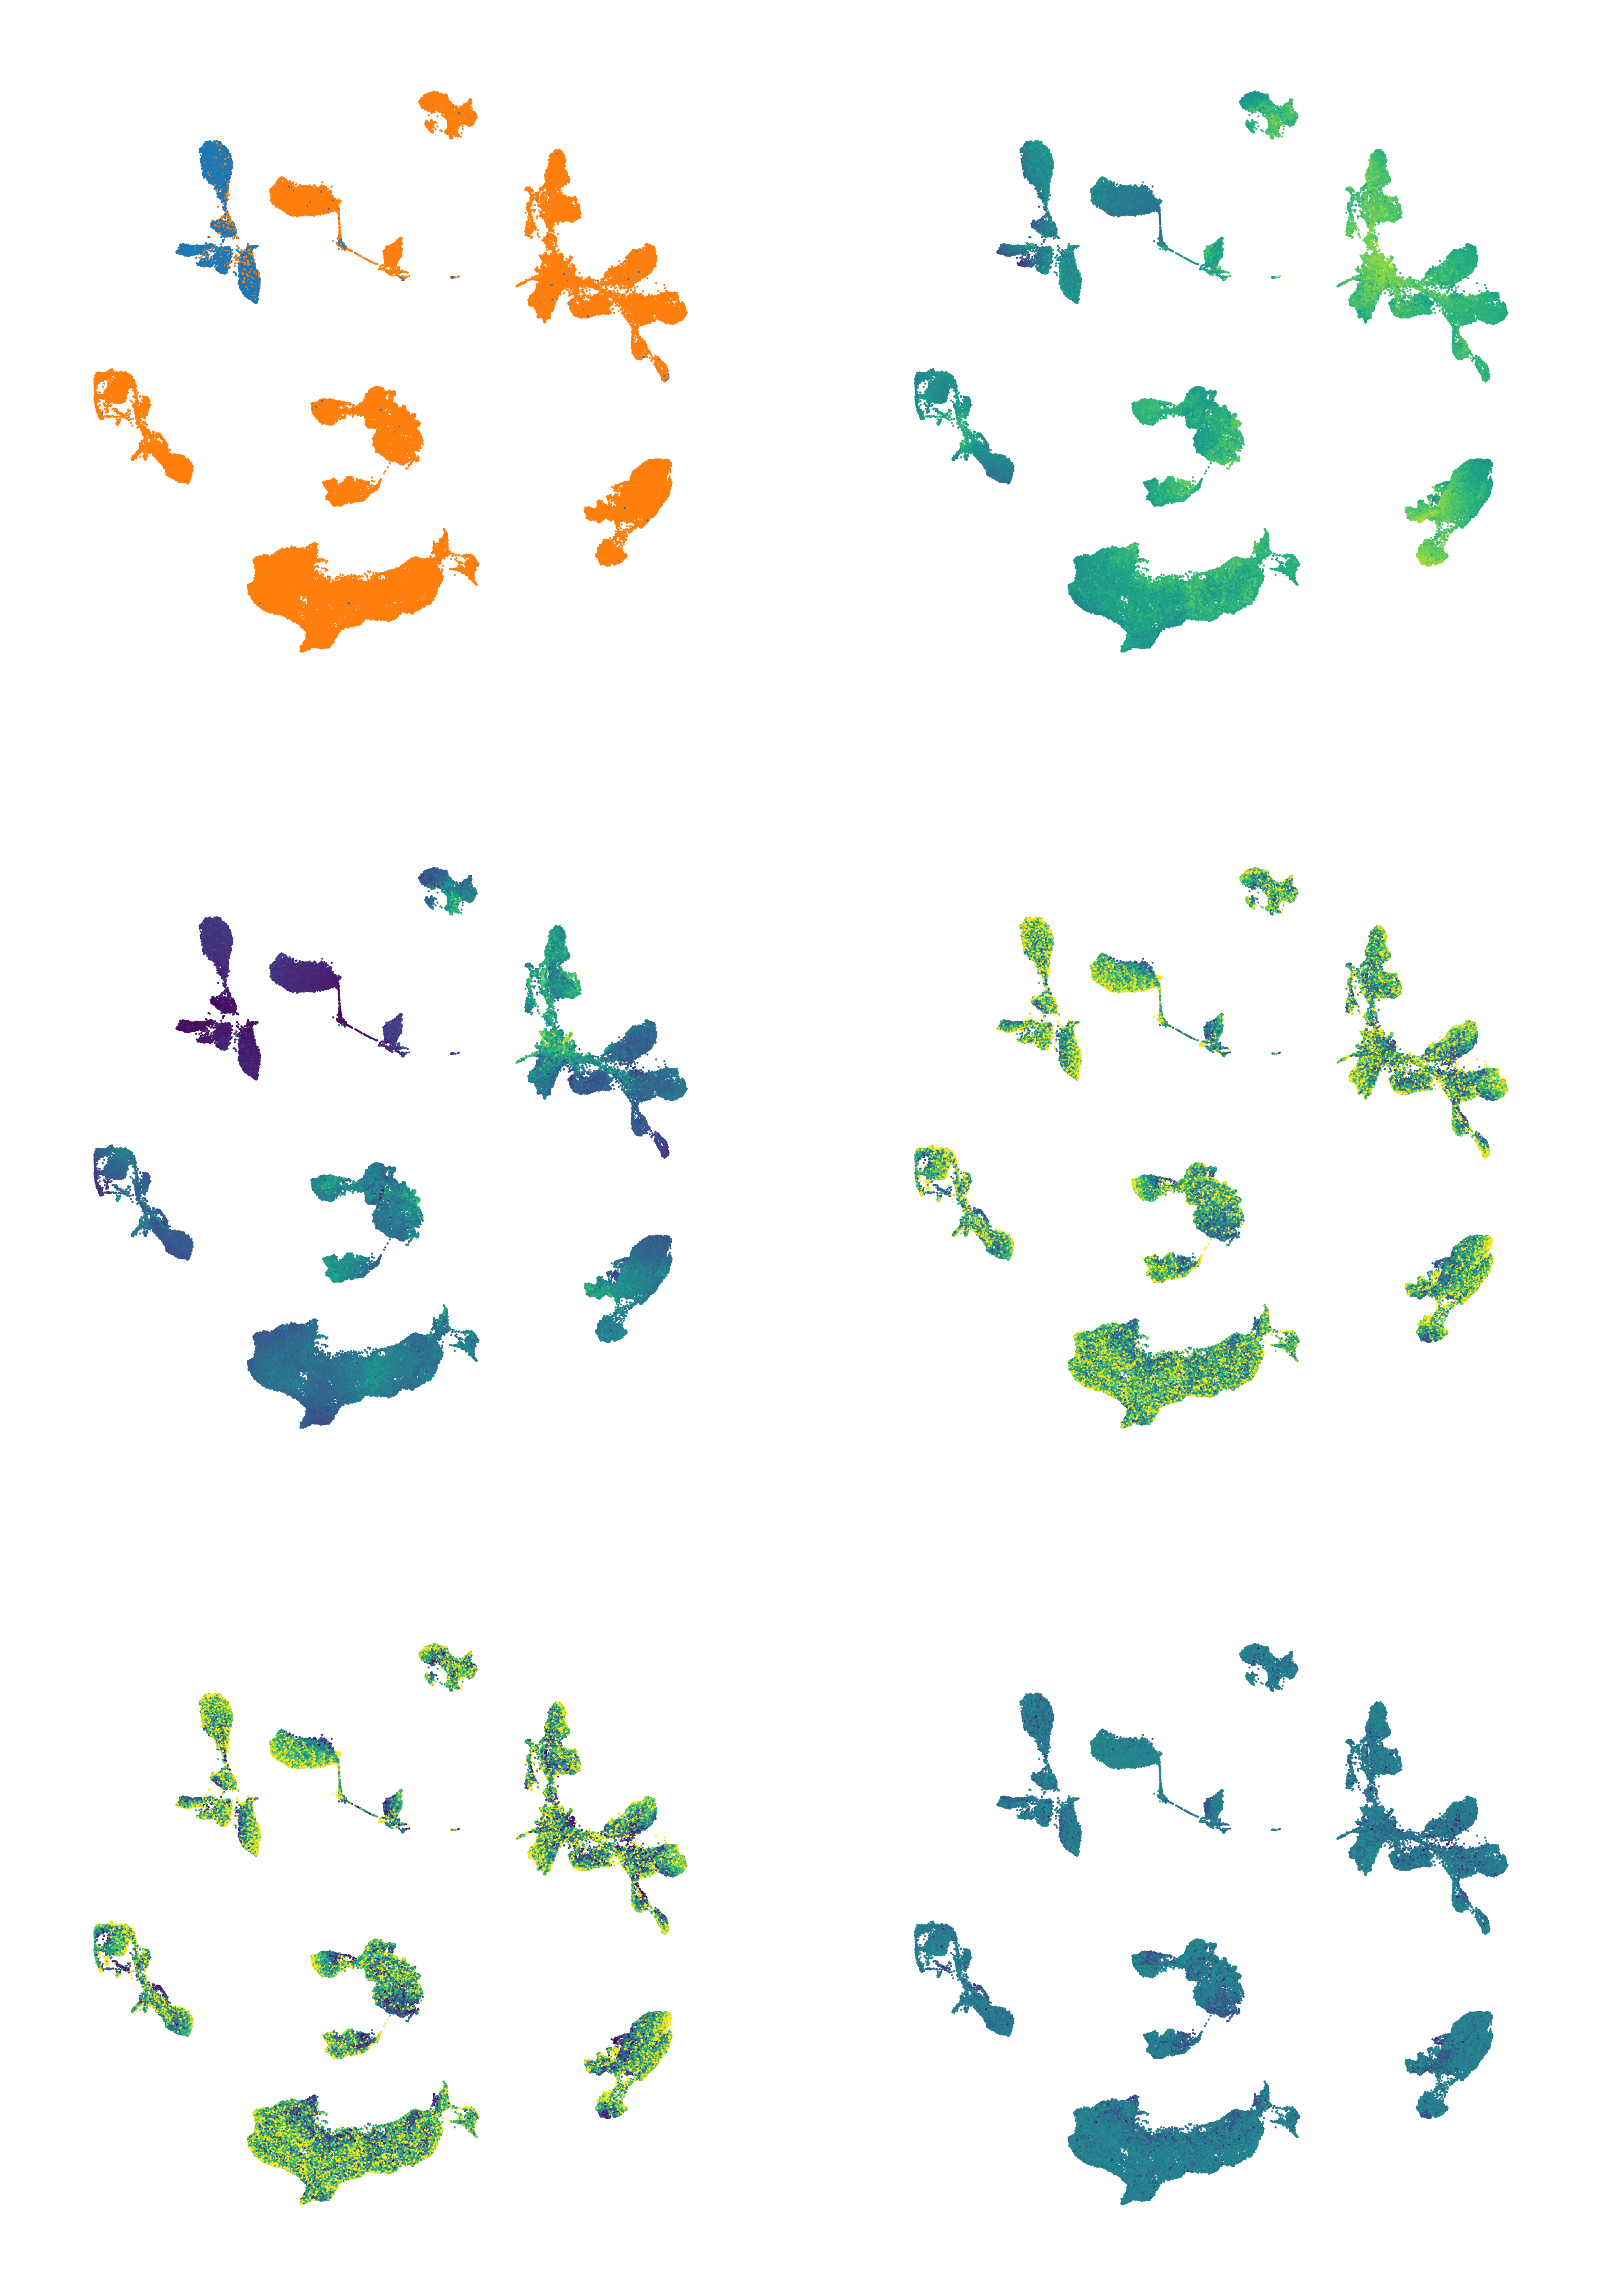

In [38]:
metric_cols = ['NeuN+', 'CG_RateAdj', 'CH_RateAdj', 'InputReads', 'FinalReads', 'MappingRate']
plot_types = ['cate', 'conti', 'conti', 'conti', 'conti', 'conti']
ylims = [None, (0.6, 0.9), (0, 0.05), (5e5, 5e6), (5e5,2e6), (0.5, 0.9)]

fig, axes = plt.subplots(figsize=(4, 6), dpi=1200, 
                         nrows=3, ncols=2)

s = 0.1

for col, ax, plot_type, hue_norm in zip(metric_cols, axes.flat, plot_types, ylims):
    if ax.is_last_row() and ax.is_first_col():
        axis_form = None
    else:
        axis_form = None
    
    if plot_type == 'conti':
        continuous_scatter(ax=ax, data=cell_tidy_data, coord_base='l1-umap', s=s, colorbar=None,
                           hue=col, hue_norm=hue_norm, axis_format=axis_form, max_points=100000)
    else:
        categorical_scatter(ax=ax, data=cell_tidy_data, coord_base='l1-umap',s=s,
                           hue=col, palette='tab10', show_legend=False, axis_format=axis_form, max_points=100000)
        
    # ax.set_title(col, fontsize=labelsize)
fig.savefig('MajorType.mapping_metric.UMAP.scatter.png')

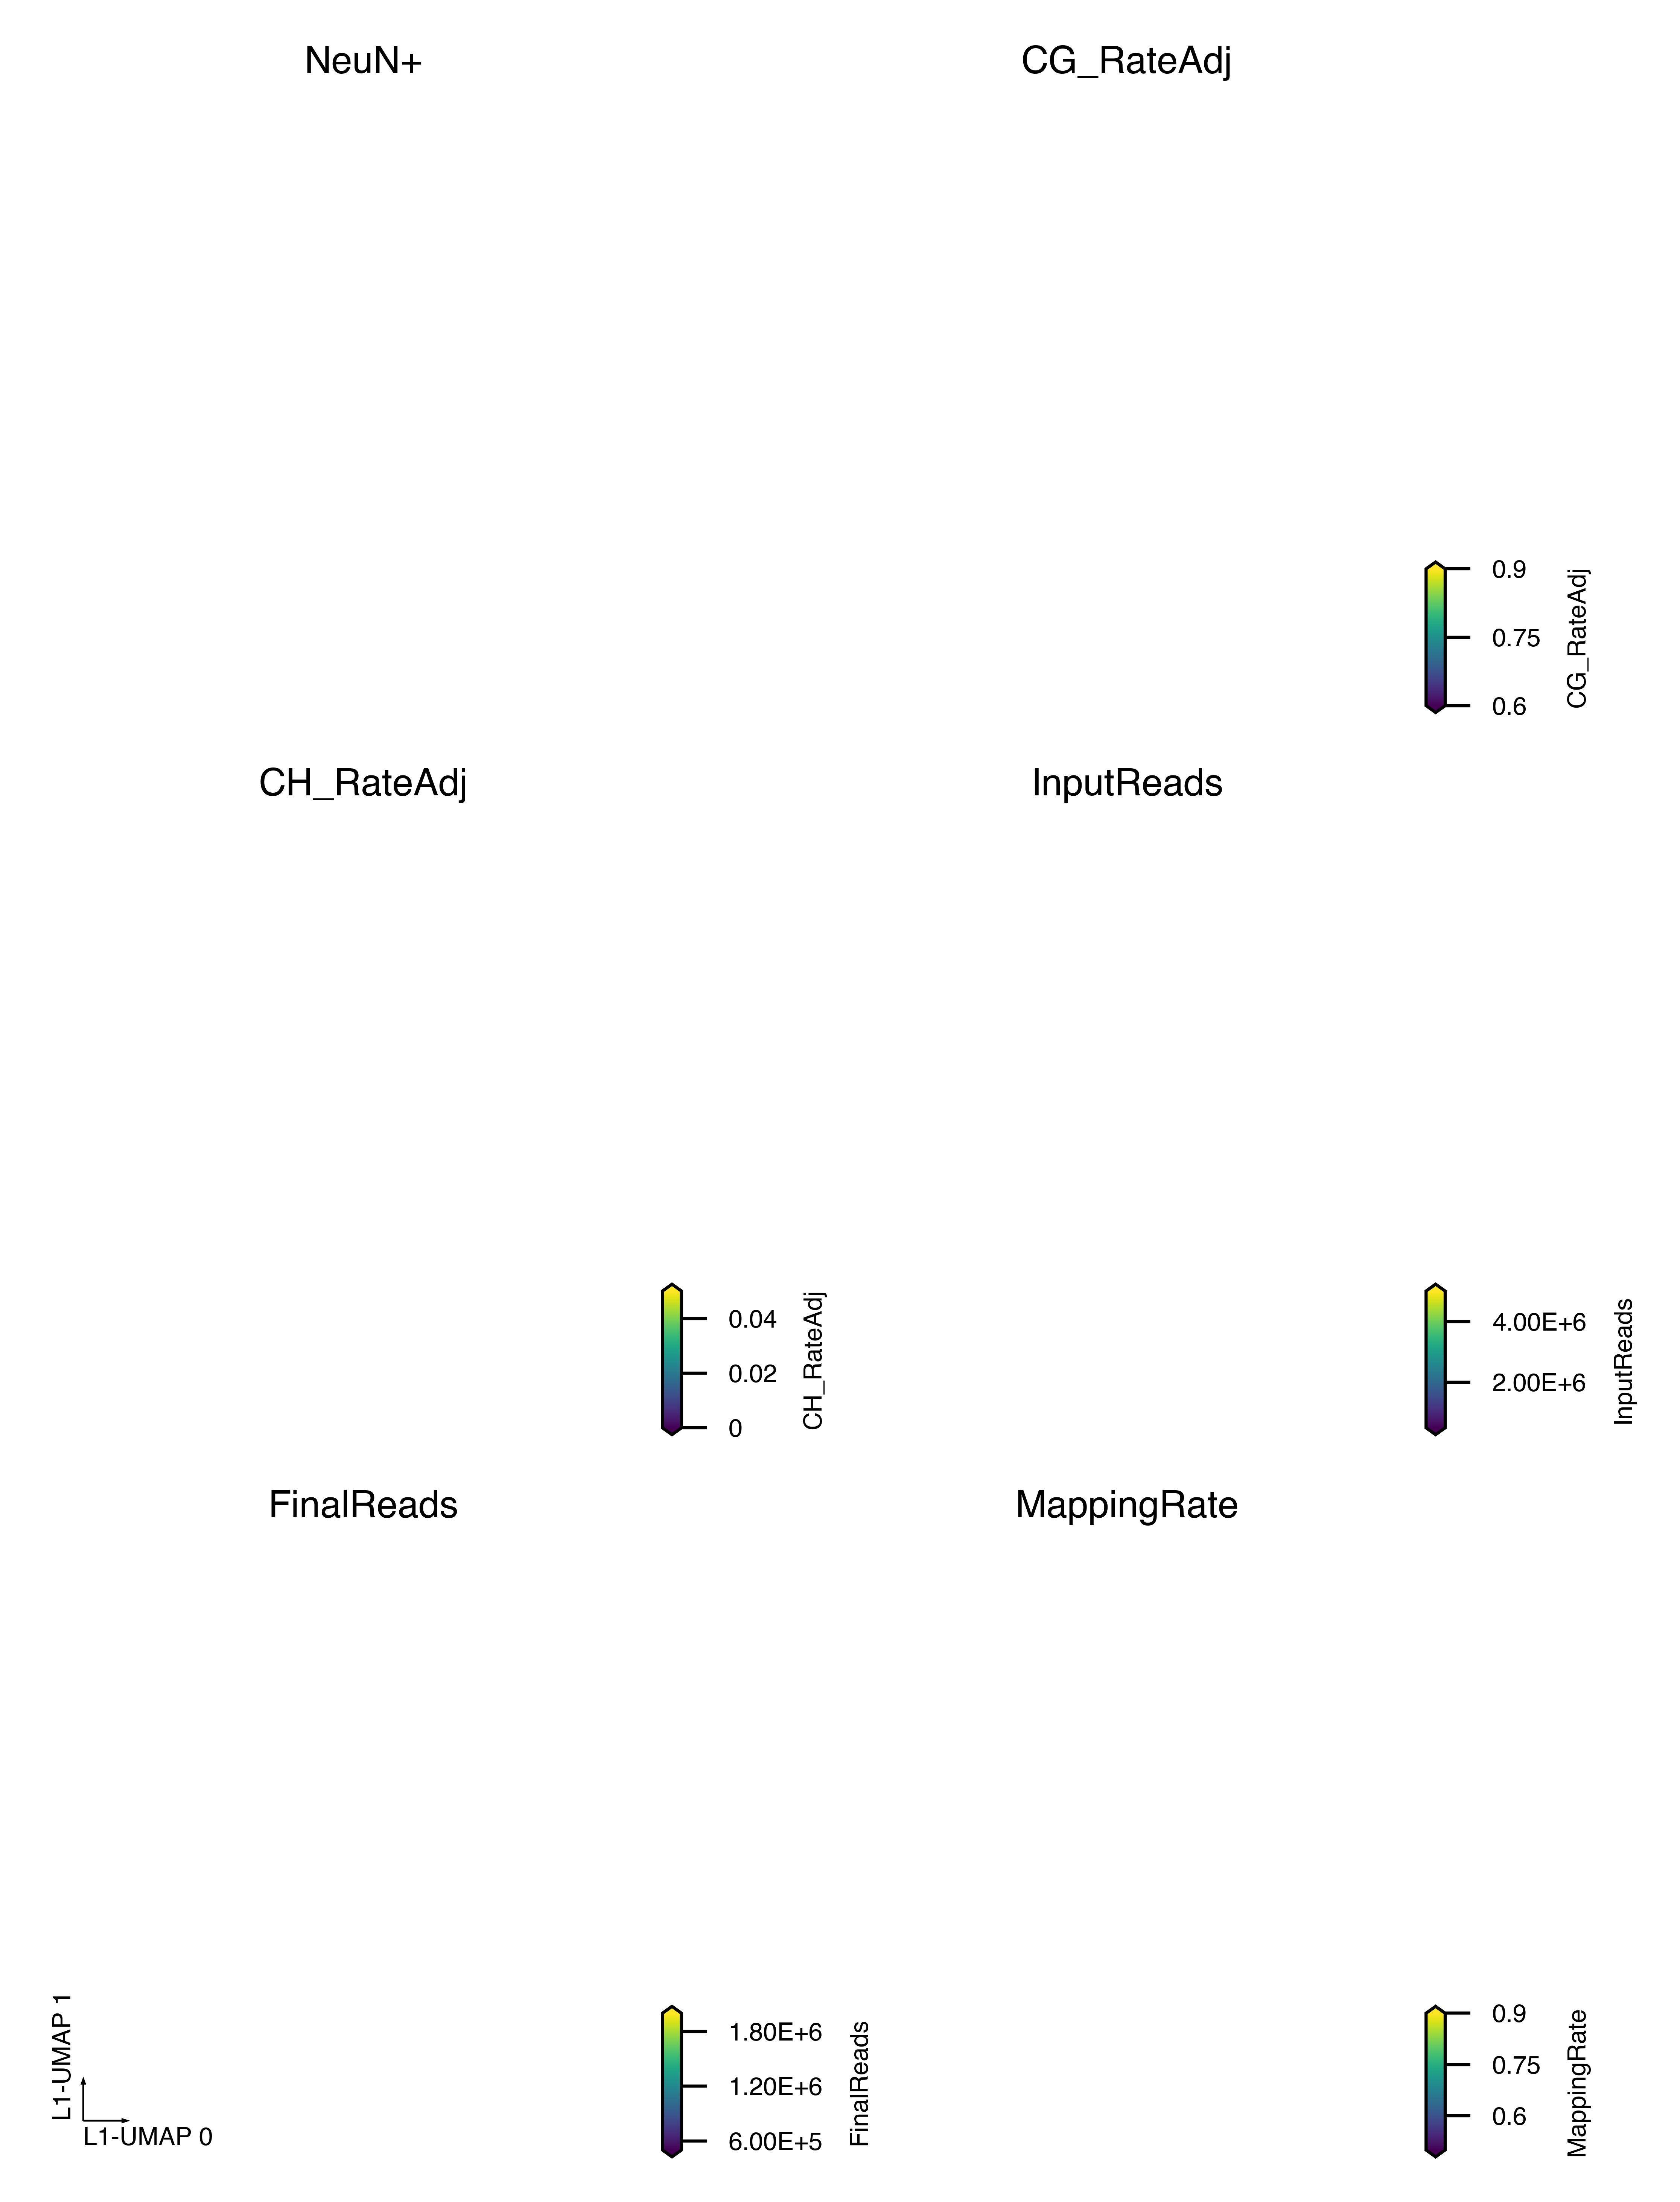

In [39]:
metric_cols = ['NeuN+', 'CG_RateAdj', 'CH_RateAdj', 'InputReads', 'FinalReads', 'MappingRate']
plot_types = ['cate', 'conti', 'conti', 'conti', 'conti', 'conti']
ylims = [None, (0.6, 0.9), (0, 0.05), (5e5, 5e6), (5e5,2e6), (0.5, 0.9)]

fig, axes = plt.subplots(figsize=(4, 6), dpi=1200, 
                         nrows=3, ncols=2)

s = 0.1

for col, ax, plot_type, hue_norm in zip(metric_cols, axes.flat, plot_types, ylims):
    if ax.is_last_row() and ax.is_first_col():
        axis_form = 'tiny'
    else:
        axis_form = None
    
    if plot_type == 'conti':
        continuous_scatter(ax=ax, data=cell_tidy_data, coord_base='l1-umap', s=s,
                           hue=col, hue_norm=hue_norm, axis_format=axis_form, max_points=100000)
    else:
        if col == 'CellClass':
            categorical_scatter(ax=ax, data=cell_tidy_data, coord_base='l1-umap',s=s,
                               hue=col, palette=cell_class_palette, 
                                axis_format=axis_form, max_points=100000)
        elif col == 'MajorType':
            categorical_scatter(ax=ax, data=cell_tidy_data, coord_base='l1-umap',s=s,
                               hue=col, palette=major_type_palette, 
                                axis_format=axis_form, max_points=100000)
        else:
            categorical_scatter(ax=ax, data=cell_tidy_data, coord_base='l1-umap',s=s,
                               hue=col, palette='tab10', show_legend=False, axis_format=axis_form, max_points=100000)
        
        
    ax.set_title(col, fontsize=labelsize)
    ax.collections[0].remove()
fig.savefig('MajorType.mapping_metric.UMAP.legend.pdf')